# Стоимость поддержанного автомобиля


**Описание задачи**

Многие знают про маркетплейсы где продаются б/у вещи, на которых есть возможность недорого купить качественную и полезную вещь. Но всегда волнует вопрос - кто и как устанавливает цену, и какие его характеристики больше всего влияют на итоговую стоимость продажи?! Вопрос становиться особо актуальным, если речь идет про дорогие товары, например про автомобили!
Предлагаем вам принять участие в Мастерской, в рамках которой вы сможете поработать с данными о продажах автомобилей на вторичном рынке. Целью вашего проекта будет разработанная модель предсказания стоимости автомобиля на вторичном рынке.

**В ходе работы вы пройдете все основные этапы полноценного исследования:**

   - загрузка и ознакомление с данными,
   - предварительная обработка,
   - полноценный разведочный анализ,
   - разработка новых синтетических признаков,
   - проверка на мультиколлинеарность,
   - отбор финального набора обучающих признаков,
   - выбор и обучение моделей,
   - итоговая оценка качества предсказания лучшей модели,
   - анализ важности ее признаков.

**Дополнительное задание**

 1. Для тех, кому этого покажется мало у нас есть дополнительное задание — создать web-приложения прототип вашей модели, используя библиотеку Streamlit.
 2. Подготовка отчета по исследованию. Если останется время можно подготовить полноценный отчет по исследовательской работе Дата Сайнтиста. Примеры хороших отчетов можно посмотреть на сайте Stanford University - отчеты по финальным проектам направления Machine Learning - https://cs229.stanford.edu/projects2014.html. Из примеров понятно наполнение отчета по исследованию, а так же, что главное - понятна сама структура отчета. В реальной работе именно такой формат отчета обычно завершает исследование.
 
Мастерская будет проходить в виде соревнования на платформе Kaggle. Длительность — 2 недели. Для участников — это отличная возможность не только выполнить интересный проект, который можно будет добавить в свое портфолио, но и познакомиться с одной из самых популярных соревновательных Интернет-площадок, на которой можно исследовать и создавать модели, взаимодействовать с другими специалистами по данным, организовывать и участвовать в конкурсах, посвященных анализу данных и машинному обучению.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold, HalvingGridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import  make_scorer
from catboost import CatBoostRegressor
from sklearn.inspection import permutation_importance

## Загрузка и ознакомление с данными



In [106]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [107]:
pd.options.display.max_columns = 100
display(df_train.head(10))
df_test.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)
5,2013,Lincoln,MKZ,Base,Sedan,automatic,3ln6l2j91dr817800,mi,2.5,14894.0,black,black,"ford motor credit company,llc",22600,Thu May 21 2015 02:00:00 GMT-0700 (PDT)
6,2010,pontiac,g6,4c,NaN,automatic,1g2za5eb4a4157380,nc,3.4,114587.0,silver,black,north state acceptance,5900,Mon Jan 12 2015 09:30:00 GMT-0800 (PST)
7,2013,Ford,Escape,SE,SUV,automatic,1fmcu0gx3duc59421,fl,4.8,26273.0,blue,gray,fields bmw,15200,Tue Feb 03 2015 01:00:00 GMT-0800 (PST)
8,2000,Hyundai,Elantra,GLS,Sedan,automatic,kmhjf35f2yu955691,oh,1.9,182624.0,black,tan,dt inventory,700,Thu Jan 22 2015 01:00:00 GMT-0800 (PST)
9,2005,Ford,Freestyle,Limited,wagon,automatic,1fmdk06135ga45438,oh,1.0,149364.0,black,tan,wells fargo dealer services,325,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)
5,2003,Volkswagen,Passat,GLS 1.8T,wagon,automatic,wvwvd63b93e175638,nc,2.4,104155.0,silver,black,fred anderson nissan of fayetteville,Tue Jun 09 2015 03:00:00 GMT-0700 (PDT)
6,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4ac4dh809686,il,3.7,30669.0,silver,gray,merchants leasing,Tue Mar 03 2015 02:00:00 GMT-0800 (PST)
7,2013,Ford,Explorer,Base,SUV,automatic,1fm5k7b97dgb16454,nc,3.2,87862.0,black,gray,ge fleet services for itself/servicer,Tue Feb 10 2015 01:15:00 GMT-0800 (PST)
8,2011,Infiniti,G Sedan,G37x,G Sedan,automatic,jn1cv6ar5bm411441,tn,3.5,47028.0,black,beige,nissan infiniti lt,Wed Feb 04 2015 02:30:00 GMT-0800 (PST)
9,2007,Chevrolet,Suburban,1500 LS,SUV,automatic,3gnfc16j77g158033,ga,3.4,191211.0,black,tan,riverside chevrolet inc,Tue Feb 10 2015 04:30:00 GMT-0800 (PST)


**Данные**

   - train.csv - информация о характеристиках автомобилей (~440000), которые будут использоваться в качестве обучающих данных.
   - test.csv - информация о характеристиках автомобилей (~110000), которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'sellingprice' для каждого автомобиля из этого датасета.
   - sample_submission.csv - пример файла предсказаний в правильном формате.
   - vin - идентификатор автомобиля в тестовом наборе.
   - sellingprice - Целевой признак. Для каждого автомобиля предскажите числовое значение стоимости продажи.
   
**Описание полей данных**

   - Date: Год выпуска автомобиля.
   - Make: Марка автомобиля.
   - Model: издание автомобиля определенной марки.
   - Trim: Уровни отделки салона автомобиля — это просто разные версии модели.
   - Body: Тип кузова транспортного средства относится к форме и модели конкретной марки автомобиля.
   - Transmission: механизм, который передает мощность от двигателя к колесам.
   - VIN: идентификационный номер транспортного средства.
   - State: состояние, в котором автомобиль выставлен на аукцион.
   - Condition: Состояние автомобилей на момент аукциона.
   - Odometer: расстояние, пройденное автомобилем с момента выпуска.
   - Color: Цвет кузова автомобиля.
   - Interior: Цвет салона автомобиля.
   - Seller: Продавец автомобиля, автосалоны.
   - mmr: Рекорд рынка Manhiem, рыночная оценочная цена автомобилей.
   - sellingprice: цена, по которой автомобиль был продан на аукционе.
   - saledate: Дата продажи автомобиля.

In [108]:
display(df_train.info())
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB


Тип данных saledate необходимо привести к формату datetime

Пропуски в трейне:

In [109]:
pd.DataFrame(round(df_train.isna().mean()*100,3)).sort_values(by = 0).style.background_gradient('coolwarm')

,0
year,0.000000
vin,0.000000
state,0.000000
seller,0.000000
sellingprice,0.000000
saledate,0.000000
odometer,0.016000
color,0.133000
interior,0.133000
make,1.827000


Пропуски в тестовом:

In [110]:
pd.DataFrame(round(df_test.isna().mean()*100,3)).sort_values(by = 0).style.background_gradient('coolwarm')

,0
year,0.000000
vin,0.000000
state,0.000000
seller,0.000000
saledate,0.000000
odometer,0.017000
color,0.144000
interior,0.144000
make,1.873000
model,1.889000


В обучающем и тестовом наборе пропуски и примерно в одинковом соотношении

Обзор уникальных значений категориальных признаков:

In [111]:
columns_object = df_train.select_dtypes(include = 'object').columns
for i in columns_object:
    print('Столбец','"'+i+'"',':')
    print(df_train[i].unique())
    print()
for i in columns_object:
    print('Столбец','"'+i+'"',':')
    print(df_test[i].unique())
    print()

Столбец "make" :
['Ford' 'Nissan' 'HUMMER' 'Lincoln' 'pontiac' 'Hyundai' nan 'Buick'
 'Chevrolet' 'Honda' 'Acura' 'Cadillac' 'GMC' 'Saab' 'Dodge'
 'Mercedes-Benz' 'Toyota' 'Volkswagen' 'BMW' 'Infiniti' 'Chrysler' 'Kia'
 'Jaguar' 'Subaru' 'Jeep' 'Lexus' 'mercedes' 'Scion' 'FIAT' 'Suzuki'
 'Mazda' 'Volvo' 'Audi' 'MINI' 'Isuzu' 'Mitsubishi' 'smart' 'Pontiac'
 'Porsche' 'subaru' 'ford' 'Land Rover' 'chrysler' 'Saturn' 'mazda'
 'dodge' 'Ram' 'Oldsmobile' 'hyundai' 'Mercury' 'Bentley' 'toyota'
 'lincoln' 'Fisker' 'nissan' 'chevrolet' 'honda' 'porsche' 'mitsubishi'
 'lexus' 'bmw' 'Maserati' 'acura' 'jeep' 'mercury' 'Tesla' 'landrover'
 'vw' 'cadillac' 'buick' 'gmc truck' 'land rover' 'volkswagen'
 'Rolls-Royce' 'audi' 'Ferrari' 'suzuki' 'Plymouth' 'oldsmobile'
 'Lamborghini' 'gmc' 'Geo' 'ford truck' 'Aston Martin' 'plymouth' 'Daewoo'
 'maserati' 'kia' 'mercedes-b' 'dodge tk' 'mazda tk' 'dot' 'airstream']

Столбец "model" :
['Edge' 'Fusion' 'Sentra' 'H2' 'MKZ' 'g6' 'Escape' 'Elantra' 'Freestyl

['santander consumer' 'ars/avis budget group' 'nissan-infiniti lt' ...
 'autostar enterprises' 'kocourek nissan' 'studio city auto group']

Столбец "saledate" :
['Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)'
 'Wed Feb 25 2015 02:00:00 GMT-0800 (PST)'
 'Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)' ...
 'Wed Jan 07 2015 02:15:00 GMT-0800 (PST)'
 'Mon Dec 22 2014 08:30:00 GMT-0800 (PST)'
 'Wed May 20 2015 01:30:00 GMT-0700 (PDT)']

Столбец "make" :
['Cadillac' 'GMC' 'Nissan' 'Chevrolet' 'Volkswagen' 'Hyundai' 'Ford'
 'Infiniti' 'Subaru' 'Kia' 'BMW' nan 'Mitsubishi' 'Dodge' 'Oldsmobile'
 'Volvo' 'Pontiac' 'Acura' 'Honda' 'Toyota' 'Audi' 'Jeep' 'Lincoln'
 'Chrysler' 'Mercedes-Benz' 'Ram' 'Scion' 'Mercury' 'Lexus' 'Saturn'
 'Mazda' 'Porsche' 'MINI' 'smart' 'Buick' 'HUMMER' 'ford' 'chrysler'
 'Jaguar' 'mitsubishi' 'FIAT' 'Saab' 'mazda' 'Suzuki' 'Land Rover' 'bmw'
 'cadillac' 'oldsmobile' 'honda' 'acura' 'buick' 'landrover' 'Geo' 'lexus'
 'dodge' 'chevrolet' 'chev truck' 'nissan' 'Bentley' 'jeep' 'mer

Видно большое количество неявных дубликатов. Необходимо приверить каждый столбец и привести к общему виду - особенно марка и модель автомобиля. В любом случае надо рассмотреть подробно каждый признак.

In [112]:
df_train.duplicated().sum()

0

In [113]:
df_test.duplicated().sum()

0

Полных дубликатов нет.

## Предварительная обработка

Рассмотрим категориальные признаки:

In [114]:
df_train.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'sellingprice',
       'saledate'],
      dtype='object')

In [115]:
display(len(df_train['make'].unique()))
display(len(df_test['make'].unique()))
display(len(df_train['model'].unique()))
len(df_test['model'].unique())

93

86

960

825

Приведем регистры в столбцах к общему виду

In [116]:
df_train['make'] = df_train['make'].str.title()
df_test['make'] = df_test['make'].str.title()

df_train['model'] = df_train['model'].str.title()
df_test['model'] = df_test['model'].str.title()

df_train['body'] = df_train['body'].str.title()
df_test['body'] = df_test['body'].str.title()

df_train['trim'] = df_train['trim'].str.upper()
df_test['trim'] = df_test['trim'].str.upper()

df_train['transmission'] = df_train['transmission'].str.lower()
df_test['transmission'] = df_test['transmission'].str.lower()

df_train['vin'] = df_train['vin'].str.lower()
df_test['vin'] = df_test['vin'].str.lower()

df_train['state'] = df_train['state'].str.lower()
df_test['state'] = df_test['state'].str.lower()

df_train['color'] = df_train['color'].str.lower()
df_test['color'] = df_test['color'].str.lower()

df_train['interior'] = df_train['interior'].str.lower()
df_test['interior'] = df_test['interior'].str.lower()

df_train['seller'] = df_train['seller'].str.lower()
df_test['seller'] = df_test['seller'].str.lower()


Привели регистры признаков. Для автомобилей укзазывается только год производства, поэтому нам необходимо для подсчета возраста автомобиля также учитывать только год продажи. Переведём тип данных 'saledate'в формат даты и времени, а также добавить столбец с годом продажи и возрасом на момент продажи.


In [117]:
df_train['saledate'].head()

0    Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1    Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2    Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3    Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4    Tue Feb 03 2015 04:00:00 GMT-0800 (PST)
Name: saledate, dtype: object

In [118]:
from dateutil.parser import parse
datetime = parse('Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)') 
print(datetime)


2015-06-02 02:30:00+07:00


In [119]:
df_train['saledate'] = df_train['saledate'].apply(parse)
df_test['saledate'] = df_test['saledate'].apply(parse)

In [120]:
df_train['saledate'].head()

0    2015-06-02 02:30:00+07:00
1    2015-02-25 02:00:00+08:00
2    2015-06-10 02:30:00+07:00
3    2015-06-17 03:00:00+07:00
4    2015-02-03 04:00:00+08:00
Name: saledate, dtype: object

In [121]:
df_train['saledate'] = pd.to_datetime(df_train['saledate'], format='%Y-%m-%d %H:%M:%S%z', utc=True)
df_test['saledate'] = pd.to_datetime(df_test['saledate'], format='%Y-%m-%d %H:%M:%S%z', utc=True)

In [122]:
df_train['sale_year'] = pd.DatetimeIndex(df_train['saledate']).year
df_test['sale_year'] = pd.DatetimeIndex(df_test['saledate']).year

df_train['age'] = abs(df_train['sale_year'] - df_train['year'])
df_test['age'] = abs(df_test['sale_year'] - df_test['year'])


In [123]:
display(df_train.info())
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          440236 non-null  int64              
 1   make          432193 non-null  object             
 2   model         432113 non-null  object             
 3   trim          431899 non-null  object             
 4   body          429843 non-null  object             
 5   transmission  388775 non-null  object             
 6   vin           440236 non-null  object             
 7   state         440236 non-null  object             
 8   condition     430831 non-null  float64            
 9   odometer      440167 non-null  float64            
 10  color         439650 non-null  object             
 11  interior      439650 non-null  object             
 12  seller        440236 non-null  object             
 13  sellingprice  440236 non-null  int64        

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          110058 non-null  int64              
 1   make          107997 non-null  object             
 2   model         107979 non-null  object             
 3   trim          107944 non-null  object             
 4   body          107464 non-null  object             
 5   transmission  97047 non-null   object             
 6   vin           110058 non-null  object             
 7   state         110058 non-null  object             
 8   condition     107679 non-null  float64            
 9   odometer      110039 non-null  float64            
 10  color         109900 non-null  object             
 11  interior      109900 non-null  object             
 12  seller        110058 non-null  object             
 13  saledate      110058 non-null  datetime64[ns

Посмотрим нет ли проблем с возрастом машин:

Машины проданы ещё до выпуска - это странно, тем более они с пробегом. Для отрицательных занчений возраста автомобиля, примем что они были проданы в год производства.


Ограмничим максимальный возраст 30ю годами:

In [124]:
df_train.loc[df_train['age']>30, 'age'] = 30
df_test.loc[df_test['age']>30, 'age'] = 30

In [125]:
df_train['age'].value_counts()

3     78716
2     78167
1     65645
4     36222
7     24868
8     23941
9     20613
5     20291
6     17116
10    16445
11    13287
0     11411
12    10182
13     7285
14     5026
15     3895
16     2496
17     1638
18     1149
19      651
20      502
21      299
22      162
23       93
24       51
25       34
30       13
27       12
26       11
29       10
28        5
Name: age, dtype: int64

In [126]:
df_train['make'].sort_values().unique()

array(['Acura', 'Airstream', 'Aston Martin', 'Audi', 'Bentley', 'Bmw',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge',
       'Dodge Tk', 'Dot', 'Ferrari', 'Fiat', 'Fisker', 'Ford',
       'Ford Truck', 'Geo', 'Gmc', 'Gmc Truck', 'Honda', 'Hummer',
       'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Landrover', 'Lexus', 'Lincoln',
       'Maserati', 'Mazda', 'Mazda Tk', 'Mercedes', 'Mercedes-B',
       'Mercedes-Benz', 'Mercury', 'Mini', 'Mitsubishi', 'Nissan',
       'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram',
       'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Smart', 'Subaru',
       'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'Vw', nan],
      dtype=object)

In [127]:
df_test['make'].sort_values().unique()

array(['Acura', 'Aston Martin', 'Audi', 'Bentley', 'Bmw', 'Buick',
       'Cadillac', 'Chev Truck', 'Chevrolet', 'Chrysler', 'Daewoo',
       'Dodge', 'Ferrari', 'Fiat', 'Fisker', 'Ford', 'Ford Tk', 'Geo',
       'Gmc', 'Honda', 'Hummer', 'Hyundai', 'Hyundai Tk', 'Infiniti',
       'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Landrover',
       'Lexus', 'Lincoln', 'Lotus', 'Maserati', 'Mazda', 'Mercedes',
       'Mercedes-Benz', 'Mercury', 'Mini', 'Mitsubishi', 'Nissan',
       'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram',
       'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Smart', 'Subaru',
       'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'Vw', nan],
      dtype=object)

Одни и те же марки написаны по разному, сделаем одинковыми:

In [128]:
df_train.loc[df_train['make'] == 'Mercedes', 'make'] = 'Mercedes-Benz'
df_train.loc[df_train['make'] == 'Mercedes-B', 'make'] = 'Mercedes-Benz'
df_train.loc[df_train['make'] == 'Bmw', 'make'] = 'BMW'
df_train.loc[df_train['make'] == 'Vw', 'make'] = 'Volkswagen'
df_train.loc[df_train['make'] == 'Chev Truck', 'make'] = 'Chevrolet'
df_train.loc[df_train['make'] == 'Dodge Tk', 'make'] = 'Dodge'
df_train.loc[df_train['make'] == 'Gmc Truck', 'make'] = 'GMC'
df_train.loc[df_train['make'] == 'Gmc', 'make'] = 'GMC'
df_train.loc[df_train['make'] == 'Ford Truck', 'make'] = 'Ford'
df_train.loc[df_train['make'] == 'Mazda Tk', 'make'] = 'Mazda'
df_train.loc[df_train['make'] == 'Hyundai Tk', 'make'] = 'Hyundai'
df_train.loc[df_train['make'] == 'Ford Tk', 'make'] = 'Ford'



In [129]:
df_test.loc[df_test['make'] == 'Mercedes', 'make'] = 'Mercedes-Benz'
df_test.loc[df_test['make'] == 'Mercedes-B', 'make'] = 'Mercedes-Benz'
df_test.loc[df_test['make'] == 'Bmw', 'make'] = 'BMW'
df_test.loc[df_test['make'] == 'Vw', 'make'] = 'Volkswagen'
df_test.loc[df_test['make'] == 'Chev Truck', 'make'] = 'Chevrolet'
df_test.loc[df_test['make'] == 'Dodge Tk', 'make'] = 'Dodge'
df_test.loc[df_test['make'] == 'Gmc Truck', 'make'] = 'GMC'
df_test.loc[df_test['make'] == 'Gmc', 'make'] = 'GMC'
df_test.loc[df_test['make'] == 'Ford Truck', 'make'] = 'Ford'
df_test.loc[df_test['make'] == 'Mazda Tk', 'make'] = 'Mazda'
df_test.loc[df_test['make'] == 'Hyundai Tk', 'make'] = 'Hyundai'
df_test.loc[df_test['make'] == 'Ford Tk', 'make'] = 'Ford'

In [131]:
df_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,sale_year,age
0,2011,Ford,Edge,SEL,Suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,2015-06-01 19:30:00+00:00,2015,4
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,2015-02-24 18:00:00+00:00,2015,1
2,2012,Nissan,Sentra,2.0 SL,Sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,2015-06-09 19:30:00+00:00,2015,3
3,2003,Hummer,H2,BASE,Suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,2015-06-16 20:00:00+00:00,2015,12
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,2015-02-02 20:00:00+00:00,2015,8


Необходимо проверить все ли марки из тестового датафрейма имеются обучающем:

In [133]:
df_test['make'].isin(df_train['make']).value_counts()

True     110057
False         1
Name: make, dtype: int64

1 марка имеется в тестовом наборе, но отсутсвует в обучающем 

In [134]:
df_test['model'].isin(df_train['model']).value_counts()

True     110046
False        12
Name: model, dtype: int64

Видим, что модели, которые есть в тестовом наборе, тоже не все включены в обучающий набор.

Заполним пропуски в столбце 'condition' медианным значением:

In [135]:

df_train['condition'].fillna(df_train['condition'].median(), inplace = True)
df_test['condition'].fillna(df_test['condition'].median(), inplace = True)

<AxesSubplot:>

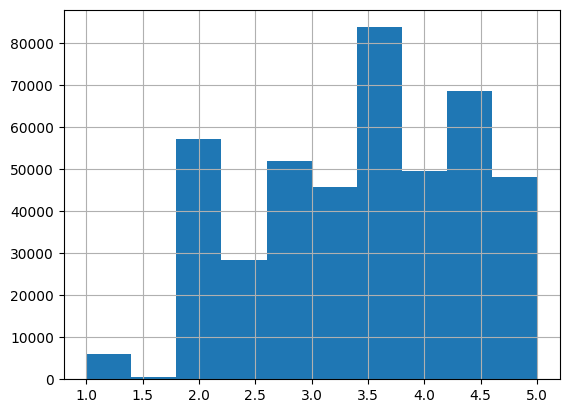

In [136]:
df_train['condition'].hist()

In [137]:
df_train['condition'].describe()

count    440236.000000
mean          3.428814
std           0.940111
min           1.000000
25%           2.700000
50%           3.600000
75%           4.200000
max           5.000000
Name: condition, dtype: float64

Заполним пропуски в столбце 'odometer':

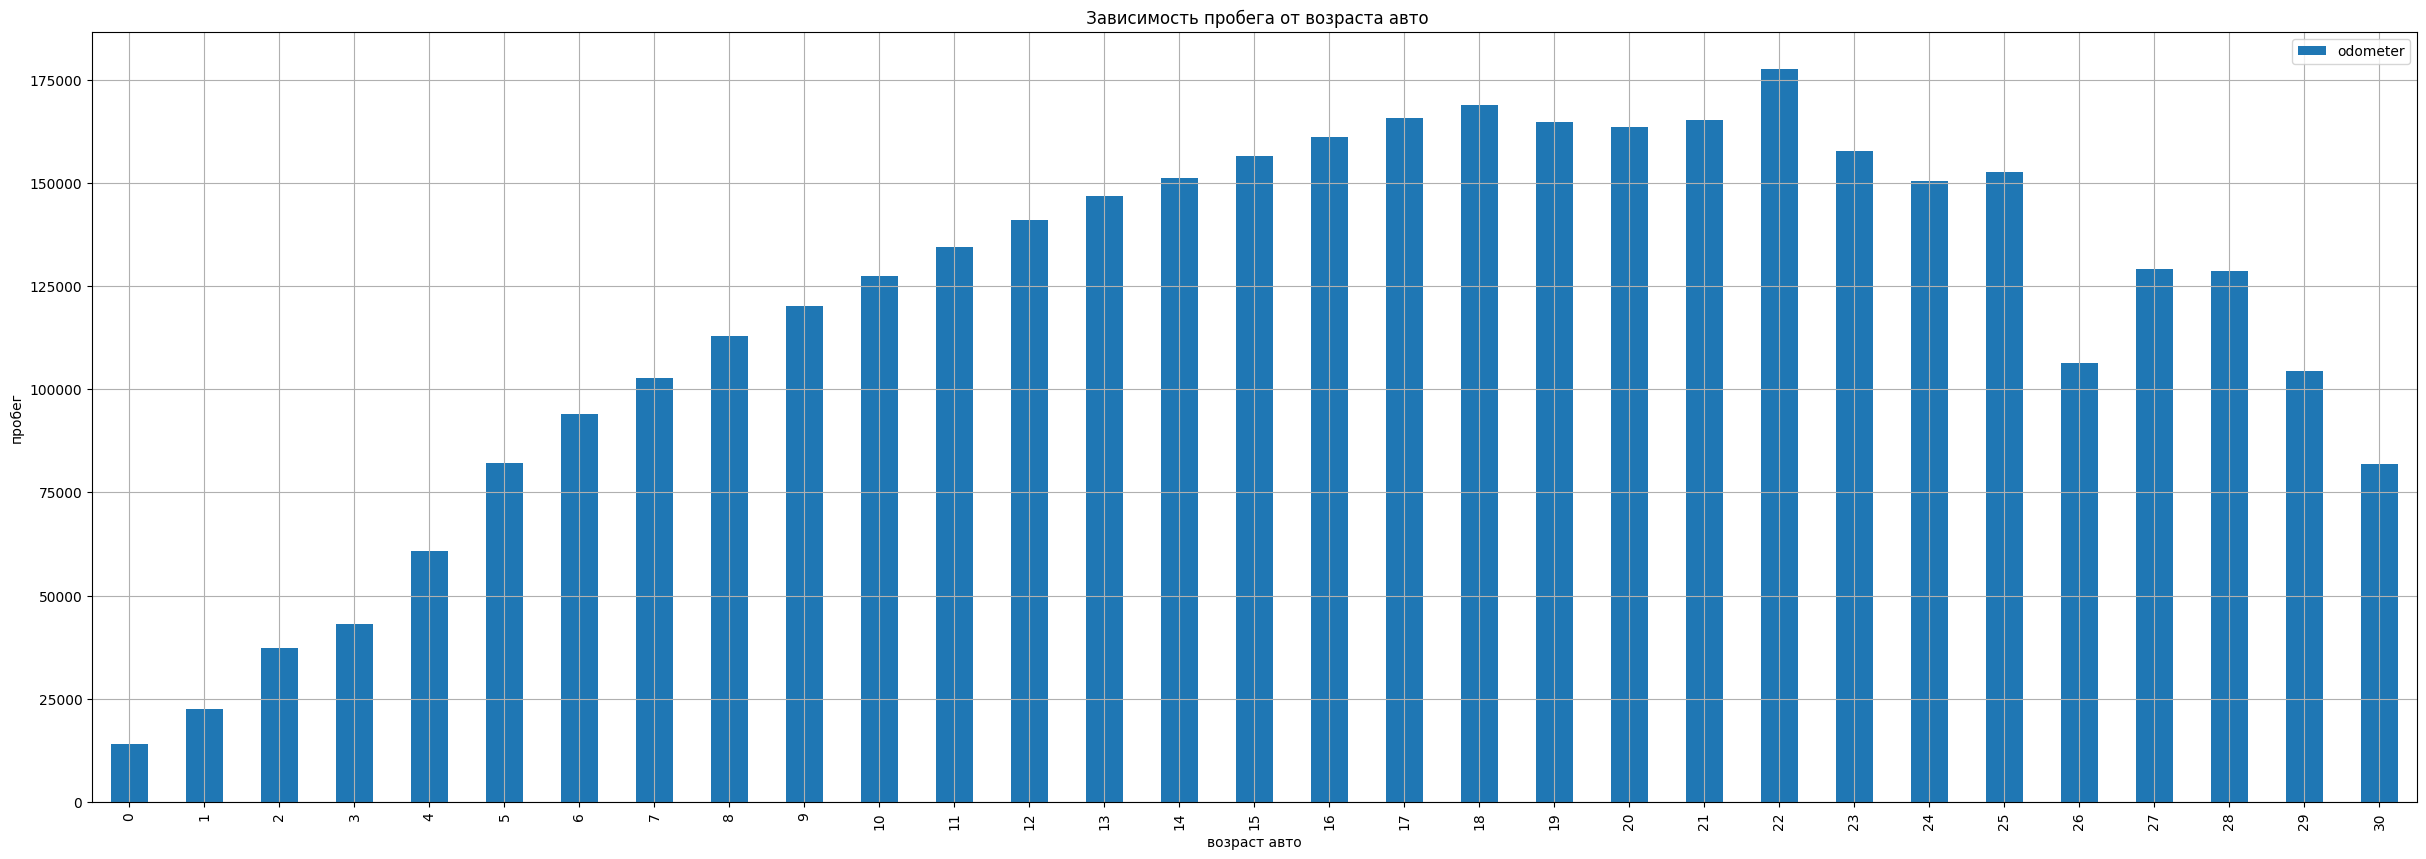

In [138]:
df_train.pivot_table(index = 'age', values = 'odometer', aggfunc = 'mean').plot(kind='bar',grid=True, figsize=(30, 10));
plt.xlabel('возраст авто')
plt.ylabel('пробег')
plt.title(' Зависимость пробега от возраста авто')
plt.show()

Заполним пропуски в пробеге, средними значениями по возрасту авто:

In [142]:
df_odo = df_train.pivot_table(index = 'age', values = 'odometer', aggfunc = 'mean').reset_index()
odo = pd.Series(df_odo['odometer'])


In [143]:
def fill_miss_odometer(odo, value, age):
    if value == 'nan':
        if  int(age) in odo.index:
            odo_fill = odo[age]
            return odo_fill
        else:
            return value
    else:
        return value 
    

In [144]:
df_train['odometer'] = df_train.apply(lambda x: fill_miss_odometer(odo, str(x['odometer']), x['age']), axis=1 )
df_test['odometer'] = df_test.apply(lambda x: fill_miss_odometer(odo, str(x['odometer']), x['age']), axis=1 )
df_train['odometer'] = pd.to_numeric(df_train['odometer'])
df_test['odometer'] = pd.to_numeric(df_test['odometer'])

In [145]:
display(df_test.info())
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          110058 non-null  int64              
 1   make          107997 non-null  object             
 2   model         107979 non-null  object             
 3   trim          107944 non-null  object             
 4   body          107464 non-null  object             
 5   transmission  97047 non-null   object             
 6   vin           110058 non-null  object             
 7   state         110058 non-null  object             
 8   condition     110058 non-null  float64            
 9   odometer      110058 non-null  float64            
 10  color         109900 non-null  object             
 11  interior      109900 non-null  object             
 12  seller        110058 non-null  object             
 13  saledate      110058 non-null  datetime64[ns

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          440236 non-null  int64              
 1   make          432193 non-null  object             
 2   model         432113 non-null  object             
 3   trim          431899 non-null  object             
 4   body          429843 non-null  object             
 5   transmission  388775 non-null  object             
 6   vin           440236 non-null  object             
 7   state         440236 non-null  object             
 8   condition     440236 non-null  float64            
 9   odometer      440236 non-null  float64            
 10  color         439650 non-null  object             
 11  interior      439650 non-null  object             
 12  seller        440236 non-null  object             
 13  sellingprice  440236 non-null  int64        

<AxesSubplot:>

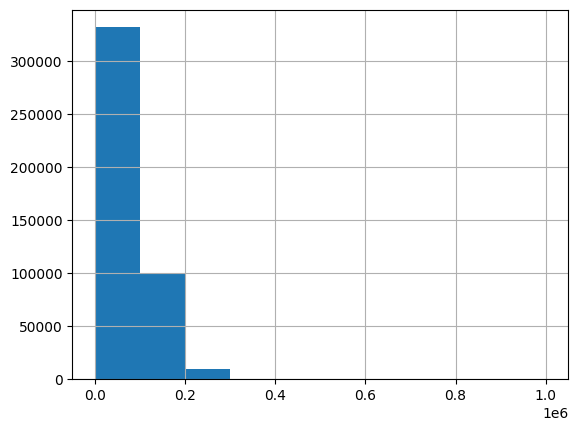

In [146]:
df_train['odometer'].hist()

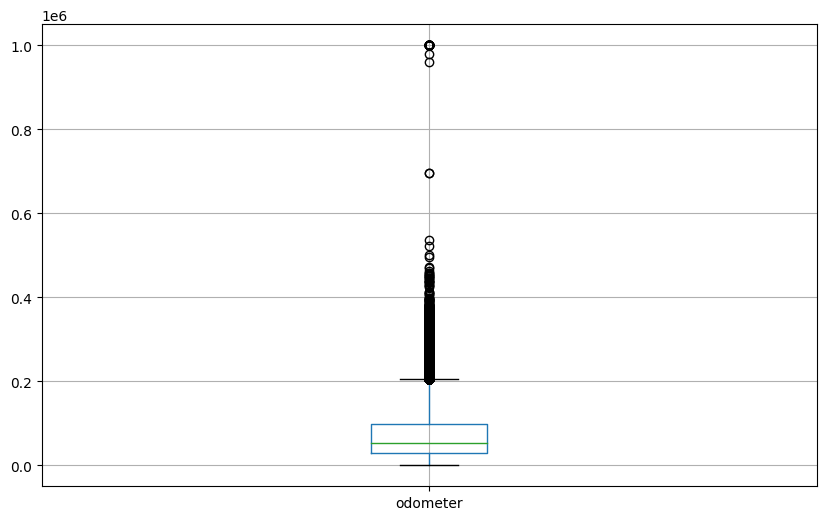

In [147]:
df_train.boxplot(
    column=['odometer'],
    figsize =(10, 6));

In [148]:
df_train['odometer'].describe()

count    440236.000000
mean      68352.868932
std       53544.455658
min           1.000000
25%       28259.000000
50%       52103.000000
75%       99283.000000
max      999999.000000
Name: odometer, dtype: float64

In [149]:
df_train.loc[df_train['odometer']>200000]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,sale_year,age
56,2003,GMC,Envoy Xl,SLT,Suv,automatic,1gkes16s036155149,fl,2.7,232005.0,white,gray,infiniti of tampa,1600,2014-12-23 08:00:00+00:00,2014,11
76,2002,Chevrolet,Impala,LS,Sedan,automatic,2g1wh55k029245232,wi,2.3,245375.0,beige,gray,patrick cadillac,1700,2015-01-07 02:00:00+00:00,2015,13
89,1999,Mercedes-Benz,E300Dt,NaN,NaN,automatic,wdbjf25h9xa799907,mi,3.6,219516.0,green,beige,warren toyota,400,2014-12-18 05:10:00+00:00,2014,15
179,2001,Nissan,Pathfinder,LE,Suv,automatic,jn8dr09x11w568557,ga,2.4,224146.0,green,beige,nalley nissan decatur,1600,2014-12-23 05:00:00+00:00,2014,13
180,2006,Chevrolet,Silverado 2500Hd,WORK TRUCK,Regular Cab,automatic,1gchc24ux6e147912,ca,2.8,233487.0,white,gray,merchants automotive group,2600,2015-01-07 04:30:00+00:00,2015,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440037,2008,Chevrolet,Express Cargo,1500,Van,automatic,1gcfg15x781152073,mi,1.9,297043.0,white,gray,flexco fleet services,1450,2015-01-21 17:30:00+00:00,2015,7
440060,2001,Mercedes-Benz,E-Class,E320,Wagon,automatic,wdbjh65j01b204822,nc,2.6,215322.0,white,gray,hendrick buick gmc cadillac,2400,2015-06-07 19:15:00+00:00,2015,14
440064,2001,Chevrolet,Silverado 1500,LT,Extended Cab,automatic,1gcek19tx1z332320,wa,4.1,215412.0,gray,gray,chevrolet cadillac of bellingham,3100,2015-01-27 20:30:00+00:00,2015,14
440141,2007,Dodge,Charger,BASE,Sedan,automatic,2b3la43r37h760104,az,2.8,202955.0,—,gray,ge fleet services for itself/servicer,4000,2015-02-11 19:00:00+00:00,2015,8


Ограничим максимальный пробег 200000 миль

In [150]:
df_train.loc[df_train['odometer']>200000, 'odometer'] = 200000
df_test.loc[df_test['odometer']>200000, 'odometer'] = 200000

А пробег меньше 5 скорее всего указан без тысяч. Поэтому умножим на 1000

In [151]:
df_train.loc[df_train['odometer']<100, 'odometer'] = 1000*df_train['odometer']
df_test.loc[df_test['odometer']<100, 'odometer'] = 1000*df_test['odometer']

In [152]:
df_train['odometer'].describe()

count    440236.000000
mean      67519.766303
std       50012.546574
min         100.000000
25%       28279.000000
50%       52126.000000
75%       99283.000000
max      200000.000000
Name: odometer, dtype: float64

Рассмотрим вин номера одинаковых автомобилей на примере [2014	Ford	Fusion	SE	Sedan	automatic]: 

In [153]:
df_train[(df_train['make']=='Ford')&(df_train['model']=='Fusion')&(df_train['transmission']=='automatic')&(df_train['year']==2014)&(df_train['trim']=='SE')&(df_train['body']=='Sedan')]


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,sale_year,age
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,2015-02-24 18:00:00+00:00,2015,1
350,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h70er138027,tn,3.2,42722.0,burgundy,black,franklin park lincoln inc,13200,2015-01-20 18:30:00+00:00,2015,1
948,2014,Ford,Fusion,SE,Sedan,automatic,1fa6p0h76e5381392,wa,5.0,18234.0,blue,black,lease plan usa,14900,2015-06-16 23:30:00+00:00,2015,1
1474,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0hd0er171728,tx,3.7,39415.0,black,black,ars/avis budget group,13700,2015-05-27 20:30:00+00:00,2015,1
1891,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h94er317687,il,4.6,28554.0,gray,black,ford motor credit company,15700,2015-05-18 21:00:00+00:00,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439483,2014,Ford,Fusion,SE,Sedan,automatic,1fa6p0h7xe5367012,tn,4.3,39346.0,—,black,ars/avis budget group,14400,2015-03-03 18:00:00+00:00,2015,1
439532,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h7xer243903,fl,4.5,15138.0,green,black,palm beach auto mall inc,29000,2015-03-30 19:30:00+00:00,2015,1
439795,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h7xer138245,fl,4.3,40392.0,—,black,ars/avis budget group,14300,2015-02-03 18:00:00+00:00,2015,1
440126,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h74er208774,fl,4.2,38338.0,—,tan,avis corporation,14000,2015-02-25 17:15:00+00:00,2015,1


Как правило, первые 5 символов vin номера автомобиля отражают модель, марку, тип кузова и тд.

Создадим новый датафрейм в который включим первые 5 символов vin номера, 'make', 'model', 'trim', 'body', 'transmission', 'vin' обучающих и тестовых наборов:

In [154]:
df_vin_new = pd.concat([
    df_train[['make', 'model', 'trim', 'body', 'transmission', 'vin']],
    df_test[['make', 'model', 'trim', 'body', 'transmission', 'vin']]
    ])

df_vin_new

,make,model,trim,body,transmission,vin
0,Ford,Edge,SEL,Suv,automatic,2fmdk3jc4bba41556
1,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976
2,Nissan,Sentra,2.0 SL,Sedan,automatic,3n1ab6ap4cl698412
3,Hummer,H2,BASE,Suv,automatic,5grgn23u93h101360
4,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380
...,...,...,...,...,...,...
110053,Jeep,Wrangler,SPORT,Suv,automatic,1j4aa2d17bl584330
110054,Lexus,Is 250,BASE,Sedan,automatic,jthbf1d23e5007526
110055,Nissan,Maxima,3.5 SL,Sedan,automatic,1n4ba41e54c831950
110056,Nissan,370Z,BASE,Coupe,manual,jn1az4eh3dm382431


Добавим столбец с первыми 5 символами vin кода с df_train и df_test и новый df_vin

In [155]:
df_train['vin_new'] = [x[:5] for x in df_train['vin']]
df_test['vin_new'] = [x[:5] for x in df_test['vin']]
df_vin = df_vin_new
df_vin['vin_new'] = [x[:5] for x in df_vin['vin']]
df_vin = df_vin.drop(columns=['vin'])
df_vin = df_vin.groupby(['vin_new'], as_index=False).head()

df_vin

,make,model,trim,body,transmission,vin_new
0,Ford,Edge,SEL,Suv,automatic,2fmdk
1,Ford,Fusion,SE,Sedan,automatic,3fa6p
2,Nissan,Sentra,2.0 SL,Sedan,automatic,3n1ab
3,Hummer,H2,BASE,Suv,automatic,5grgn
4,Ford,Fusion,SEL,Sedan,automatic,3fahp
...,...,...,...,...,...,...
108609,Volkswagen,New Beetle,TDI,Hatchback,automatic,3vwrr
108746,Pontiac,Pursuit,NaN,NaN,NaN,1g2aj
108759,Audi,Tt,QUATTRO,Coupe,manual,truuc
108833,Bentley,Continental Flying Spur Speed,BASE,Sedan,automatic,scbbp


Удалим все строки с пропусками в дф  df_vin:

In [156]:
df_vin= df_vin[(df_vin['make'].notna())&(df_vin['model'].notna())&(df_vin['trim'].notna())&(df_vin['body'].notna())&(df_vin['transmission'].notna())]

In [157]:
df_vin

,make,model,trim,body,transmission,vin_new
0,Ford,Edge,SEL,Suv,automatic,2fmdk
1,Ford,Fusion,SE,Sedan,automatic,3fa6p
2,Nissan,Sentra,2.0 SL,Sedan,automatic,3n1ab
3,Hummer,H2,BASE,Suv,automatic,5grgn
4,Ford,Fusion,SEL,Sedan,automatic,3fahp
...,...,...,...,...,...,...
108530,Cadillac,Ats,PREMIUM,Sedan,automatic,1g6ae
108609,Volkswagen,New Beetle,TDI,Hatchback,automatic,3vwrr
108759,Audi,Tt,QUATTRO,Coupe,manual,truuc
108833,Bentley,Continental Flying Spur Speed,BASE,Sedan,automatic,scbbp


In [158]:
df_train.loc[(df_train['vin_new']=='2fmdk')&(df_train['make'].isna())].head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,sale_year,age,vin_new
232657,2011,NaN,NaN,NaN,NaN,automatic,2fmdk4gc2bbb39417,oh,4.5,74071.0,silver,gray,remarketing by ge/ge capital solutions,14500,2015-02-16 17:30:00+00:00,2015,4,2fmdk


In [159]:
df_train.loc[(df_train['vin_new']=='2fmdk')]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,sale_year,age,vin_new
0,2011,Ford,Edge,SEL,Suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,2015-06-01 19:30:00+00:00,2015,4,2fmdk
29,2012,Ford,Edge,SEL,Suv,automatic,2fmdk3jc6cba90002,mi,4.2,47518.0,blue,beige,"ford motor credit company,llc",19500,2015-03-04 17:00:00+00:00,2015,3,2fmdk
36,2013,Ford,Edge,SEL,Suv,automatic,2fmdk3jc9dbb30736,ca,4.5,22996.0,white,black,"ford motor credit company,llc",23500,2015-01-08 04:00:00+00:00,2015,2,2fmdk
46,2014,Ford,Edge,LIMITED,Suv,automatic,2fmdk4kc6eba72011,tn,4.8,27573.0,red,black,avis budget group,25100,2015-01-21 19:00:00+00:00,2015,1,2fmdk
242,2013,Ford,Edge,SE,Suv,automatic,2fmdk3gc4dbb82251,il,5.0,5557.0,silver,black,"ford motor credit company,llc",20100,2015-02-23 19:00:00+00:00,2015,2,2fmdk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439638,2011,Ford,Edge,SE,Suv,automatic,2fmdk3gc4bba32945,fl,3.6,68365.0,silver,gray,"pnc bank, national association",12800,2015-01-26 17:30:00+00:00,2015,4,2fmdk
439760,2013,Ford,Edge,SEL,Suv,automatic,2fmdk3jc5dbb43189,mo,4.3,20547.0,black,gray,"ford motor credit company,llc pd",22600,2015-06-15 23:30:00+00:00,2015,2,2fmdk
439839,2013,Ford,Edge,SEL,Suv,NaN,2fmdk3jc7dba01720,on,3.7,56771.0,silver,black,canadian road leasing co & ford credit canda ltd,18300,2015-06-15 20:00:00+00:00,2015,2,2fmdk
440101,2010,Ford,Edge,SE,Suv,automatic,2fmdk3gcxabb66437,ca,3.3,98793.0,blue,black,wheels exchange llc,9900,2015-01-20 20:30:00+00:00,2015,5,2fmdk


Заполним пропуски в обучающем и тестовом датафрейме в соотвествии со значениями 'vin_new' df_vin

In [160]:
def fill_miss_make(df_vin, value, vin_index, column):
    if value == 'nan':
        if vin_index in df_vin['vin_new'].values:
            make_fill = (df_vin.loc[df_vin['vin_new'] == vin_index, column].iloc[0])
            return make_fill
        else:
            return np.nan
    else:
        return value 
    

In [161]:
for column in ['make', 'model','trim', 'body', 'transmission']:
    df_train[column] = df_train.apply(lambda x: fill_miss_make(df_vin, str(x[column]), x['vin_new'], column), axis=1 )
    df_test[column] = df_test.apply(lambda x: fill_miss_make(df_vin, str(x[column]), x['vin_new'], column), axis=1 )
df_train = df_train.drop(columns=['vin_new'])
df_test = df_test.drop(columns=['vin_new'])

используем первые два символа вин для заполнения марки

In [162]:
df_train['vin_new'] = [x[:2] for x in df_train['vin']]
df_test['vin_new'] = [x[:2] for x in df_test['vin']]
df_vin = df_vin_new
df_vin['vin_new'] = [x[:2] for x in df_vin['vin']]
df_vin = df_vin.drop(columns=['vin'])
df_vin = df_vin.groupby(['vin_new'], as_index=False).head()
df_vin= df_vin[(df_vin['make'].notna())&(df_vin['model'].notna()
                                        )&(df_vin['trim'].notna())&(df_vin['body'].notna())&(df_vin['transmission'].notna())]

for column in ['make']:
    df_train[column] = df_train.apply(lambda x: fill_miss_make(df_vin, str(x[column]), x['vin_new'], column), axis=1 )
    df_test[column] = df_test.apply(lambda x: fill_miss_make(df_vin, str(x[column]), x['vin_new'], column), axis=1 )
df_train = df_train.drop(columns=['vin_new'])
df_test = df_test.drop(columns=['vin_new'])

Заполним пропуски в столбце 'transmission' с более часто встречающимся:

In [163]:
df_train['transmission'].value_counts(0)

automatic    423769
manual        16025
Name: transmission, dtype: int64

In [164]:
df_train.loc[df_train['transmission'].isna(),'transmission' ] = 'automatic'

In [165]:
pd.DataFrame(round(df_train.isna().mean()*100,3)).sort_values(by = 0).style.background_gradient('coolwarm')

,0
year,0.000000
saledate,0.000000
sellingprice,0.000000
seller,0.000000
odometer,0.000000
sale_year,0.000000
state,0.000000
condition,0.000000
transmission,0.000000
vin,0.000000


Как видим количесво пропусков уменьшилось.

Рассмотрим целевой признак:

In [166]:
df_train['sellingprice'].describe()

count    440236.000000
mean      13592.209588
std        9751.479098
min           1.000000
25%        6900.000000
50%       12100.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64

Авто меньше 100 баксов:

In [167]:
df_train.loc[df_train['sellingprice']]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,sale_year,age
12500,2013,Dodge,Journey,SXT,Suv,automatic,3c4pddbg2dt615064,ca,3.7,34322.0,black,black,avis rac/san leandro,16700,2015-02-03 20:30:00+00:00,2015,2
14500,2009,Mini,Cooper,S,Hatchback,automatic,wmwmf73509tv39856,tx,3.5,62318.0,beige,beige,heavenly motors of texas ltd,10900,2015-02-03 18:05:00+00:00,2015,6
9100,2012,Honda,Odyssey,EX,Minivan,automatic,5fnrl5h40cb078495,fl,4.1,41581.0,white,beige,coral springs honda,18900,2014-12-18 03:00:00+00:00,2014,2
13300,2011,Honda,Accord,EX-L V-6,Coupe,automatic,1hgcs2b86ba001514,nv,4.6,38221.0,gray,black,new century bmw,16000,2015-06-11 21:55:00+00:00,2015,4
1300,2001,Ford,Mustang,GT PREMIUM,Convertible,automatic,1fafp45x21f199091,mi,1.9,98981.0,black,black,credit acceptance corp/vrs/southfield,2800,2015-02-04 17:30:00+00:00,2015,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16000,2012,Ford,Focus,TITANIUM,Sedan,automatic,1fahp3j27cl310560,oh,3.5,50479.0,black,black,"ford motor credit company,llc",11500,2015-05-25 19:00:00+00:00,2015,3
24250,2014,Dodge,Journey,SXT,Suv,automatic,3c4pdcbg3et177831,mn,4.0,28613.0,red,black,hertz corporation/gdp,14000,2015-02-10 21:00:00+00:00,2015,1
16750,2007,Chrysler,Aspen,LIMITED,Suv,automatic,1a8hx58217f525747,ca,3.7,102273.0,gray,silver,aaero sweet company,10250,2015-02-03 20:00:00+00:00,2015,8
33000,2010,Subaru,Impreza,WRX,Sedan,manual,jf1ge7g6xag513340,nc,3.9,122449.0,off-white,black,primeritus remarketing / chesterfield impor,14100,2015-02-08 17:30:00+00:00,2015,5


Дорогие авто(больше 100000 баксов):

In [168]:
df_train.loc[df_train['sellingprice']>100000]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,sale_year,age
3046,2014,Mercedes-Benz,G-Class,G63 AMG,Suv,automatic,wdcyc7df6ex216753,ca,5.0,980.0,charcoal,black,chings trading,134000,2014-12-18 04:30:00+00:00,2014,0
6464,2013,Bentley,Continental Gtc,BASE,Convertible,automatic,scbgu3za2dc084880,ga,3.5,13840.0,gray,tan,porsche fin svcs dba bentley financial services,130500,2015-05-26 20:00:00+00:00,2015,2
9787,2013,Mercedes-Benz,G-Class,G63 AMG,Suv,automatic,wdcyc7df5dx202289,ca,4.4,23663.0,gray,black,honda of pasadena,109000,2015-02-11 20:30:00+00:00,2015,2
12304,2014,Audi,Rs 7,PRESTIGE QUATTRO,Sedan,automatic,wuaw2afc7en902024,ca,5.0,6526.0,black,black,kawo int'l inc,105000,2014-12-18 04:30:00+00:00,2014,0
13149,2014,BMW,I8,BASE,Coupe,automatic,wby2z2c50evx64103,ca,5.0,603.0,white,beige,high bid trading co inc,158000,2015-02-11 20:00:00+00:00,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427614,2012,Ferrari,California,BASE,Convertible,automatic,zff65tja4c0187060,fl,4.2,8972.0,gray,black,the collection,138000,2015-05-27 19:15:00+00:00,2015,3
431767,2014,Land Rover,Range Rover,SUPERCHARGED,Suv,automatic,salgs2ef7ea152790,ca,4.8,9968.0,black,black,high bid trading co inc,104000,2015-02-11 20:00:00+00:00,2015,1
432735,2010,Bentley,Continental Supersports,BASE,Coupe,automatic,scbcu8za2ac064118,ca,3.2,5138.0,red,black,jn group inc,101000,2015-01-28 02:00:00+00:00,2015,5
438781,2014,Land Rover,Range Rover,SUPERCHARGED,Suv,automatic,salgs2ef7ea152398,ca,5.0,2282.0,black,black,land rover north america llc,110000,2015-01-14 20:30:00+00:00,2015,1


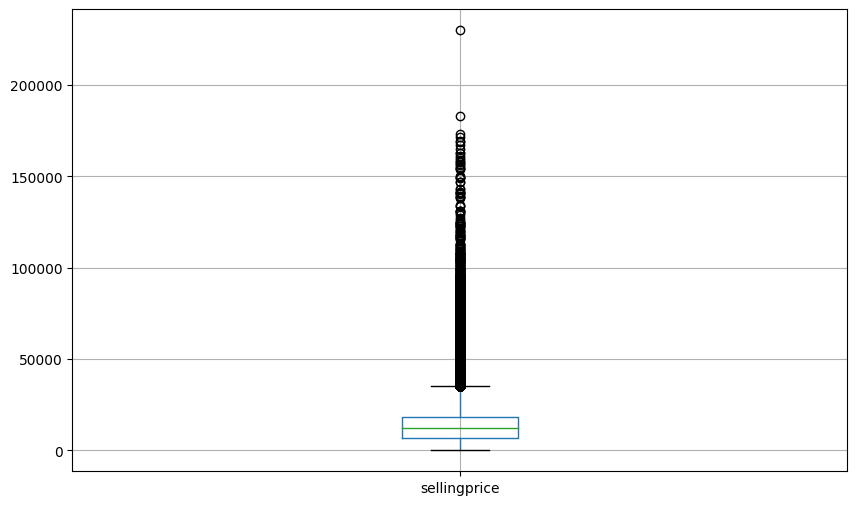

In [169]:
df_train.boxplot(
    column=['sellingprice'],
    figsize =(10, 6));

Ограничим максимальную цену в обучающей выборке 300000, так как их всего 134. А цены менее 10 умножим на 1000. 

In [170]:
df_train.loc[df_train['sellingprice']<10, 'sellingprice'] = 1000*df_train['sellingprice']
df_train.loc[df_train['sellingprice']>300000, 'sellingprice'] = 300000
df_train['sellingprice'].describe()

count    440236.000000
mean      13592.214126
std        9751.473005
min         100.000000
25%        6900.000000
50%       12100.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64

Заменим редкие значения seller на заглушки:

In [171]:
seller_count = pd.DataFrame(df_train['seller'].value_counts()).reset_index()
seller_del = np.array(seller_count.loc[seller_count['seller'] < 4]['index'])
df_train.loc[df_train['seller'].isin(seller_del), 'seller'] = 'unknown'
df_test.loc[df_test['seller'].isin(seller_del), 'seller'] = 'unknown'
df_train['seller'].value_counts()

nissan-infiniti lt                          15823
ford motor credit company,llc               15276
the hertz corporation                       14692
santander consumer                          12230
unknown                                     11209
                                            ...  
tantramar chevrolet buick gmc (2009) ltd        4
red hoagland hyundai inc                        4
roy schmidt honda                               4
randy butler automotive inc                     4
greater surburban acceptance corp               4
Name: seller, Length: 5572, dtype: int64

аменим редкие значения 'body' на самый часто встречающийся:

In [172]:
df_train['body'].value_counts().head(2)

Sedan    192786
Suv      116005
Name: body, dtype: int64

In [173]:
df_train.loc[df_train['body'].isna(), 'body'] = 'Sedan'

Предварительную обработку провели. Остальные пропуски заполним 'unknown':

In [174]:
df_train = df_train.fillna('unknown')
df_test = df_test.fillna('unknown')


In [175]:
df_train.to_csv('df_train.csv', index=False)
df_test.to_csv('df_test.csv', index=False)


## Разведочный анализ

In [176]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          440236 non-null  int64              
 1   make          440236 non-null  object             
 2   model         440236 non-null  object             
 3   trim          440236 non-null  object             
 4   body          440236 non-null  object             
 5   transmission  440236 non-null  object             
 6   vin           440236 non-null  object             
 7   state         440236 non-null  object             
 8   condition     440236 non-null  float64            
 9   odometer      440236 non-null  float64            
 10  color         440236 non-null  object             
 11  interior      440236 non-null  object             
 12  seller        440236 non-null  object             
 13  sellingprice  440236 non-null  int64        

In [177]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,440236.0,2010.040101,3.977945,1982.0,2007.0,2012.0,2013.0,2015.0
condition,440236.0,3.428814,0.940111,1.0,2.7,3.6,4.2,5.0
odometer,440236.0,67519.766303,50012.546574,100.0,28279.0,52126.0,99283.0,200000.0
sellingprice,440236.0,13592.214126,9751.473005,100.0,6900.0,12100.0,18200.0,230000.0
sale_year,440236.0,2014.902511,0.296622,2014.0,2015.0,2015.0,2015.0,2015.0
age,440236.0,4.863144,3.953324,0.0,2.0,3.0,7.0,30.0


In [178]:
pip install phik==0.10.0

Note: you may need to restart the kernel to use updated packages.


In [179]:
columns_corr = ['year', 'condition', 'odometer', 'sale_year', 'age']

interval columns not set, guessing: ['year', 'condition', 'odometer', 'sale_year', 'age']


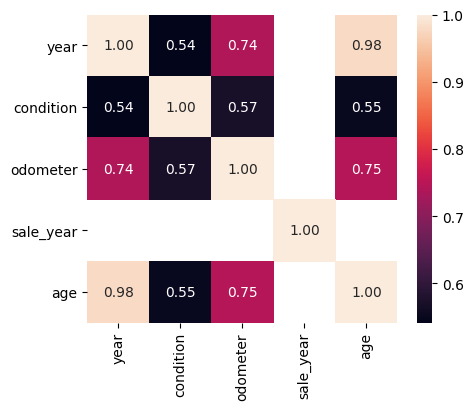

In [180]:
import seaborn as sns
import phik
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(df_train[columns_corr].phik_matrix(), annot= True , fmt=".2f");

In [181]:
df_train.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'sellingprice',
       'saledate', 'sale_year', 'age'],
      dtype='object')

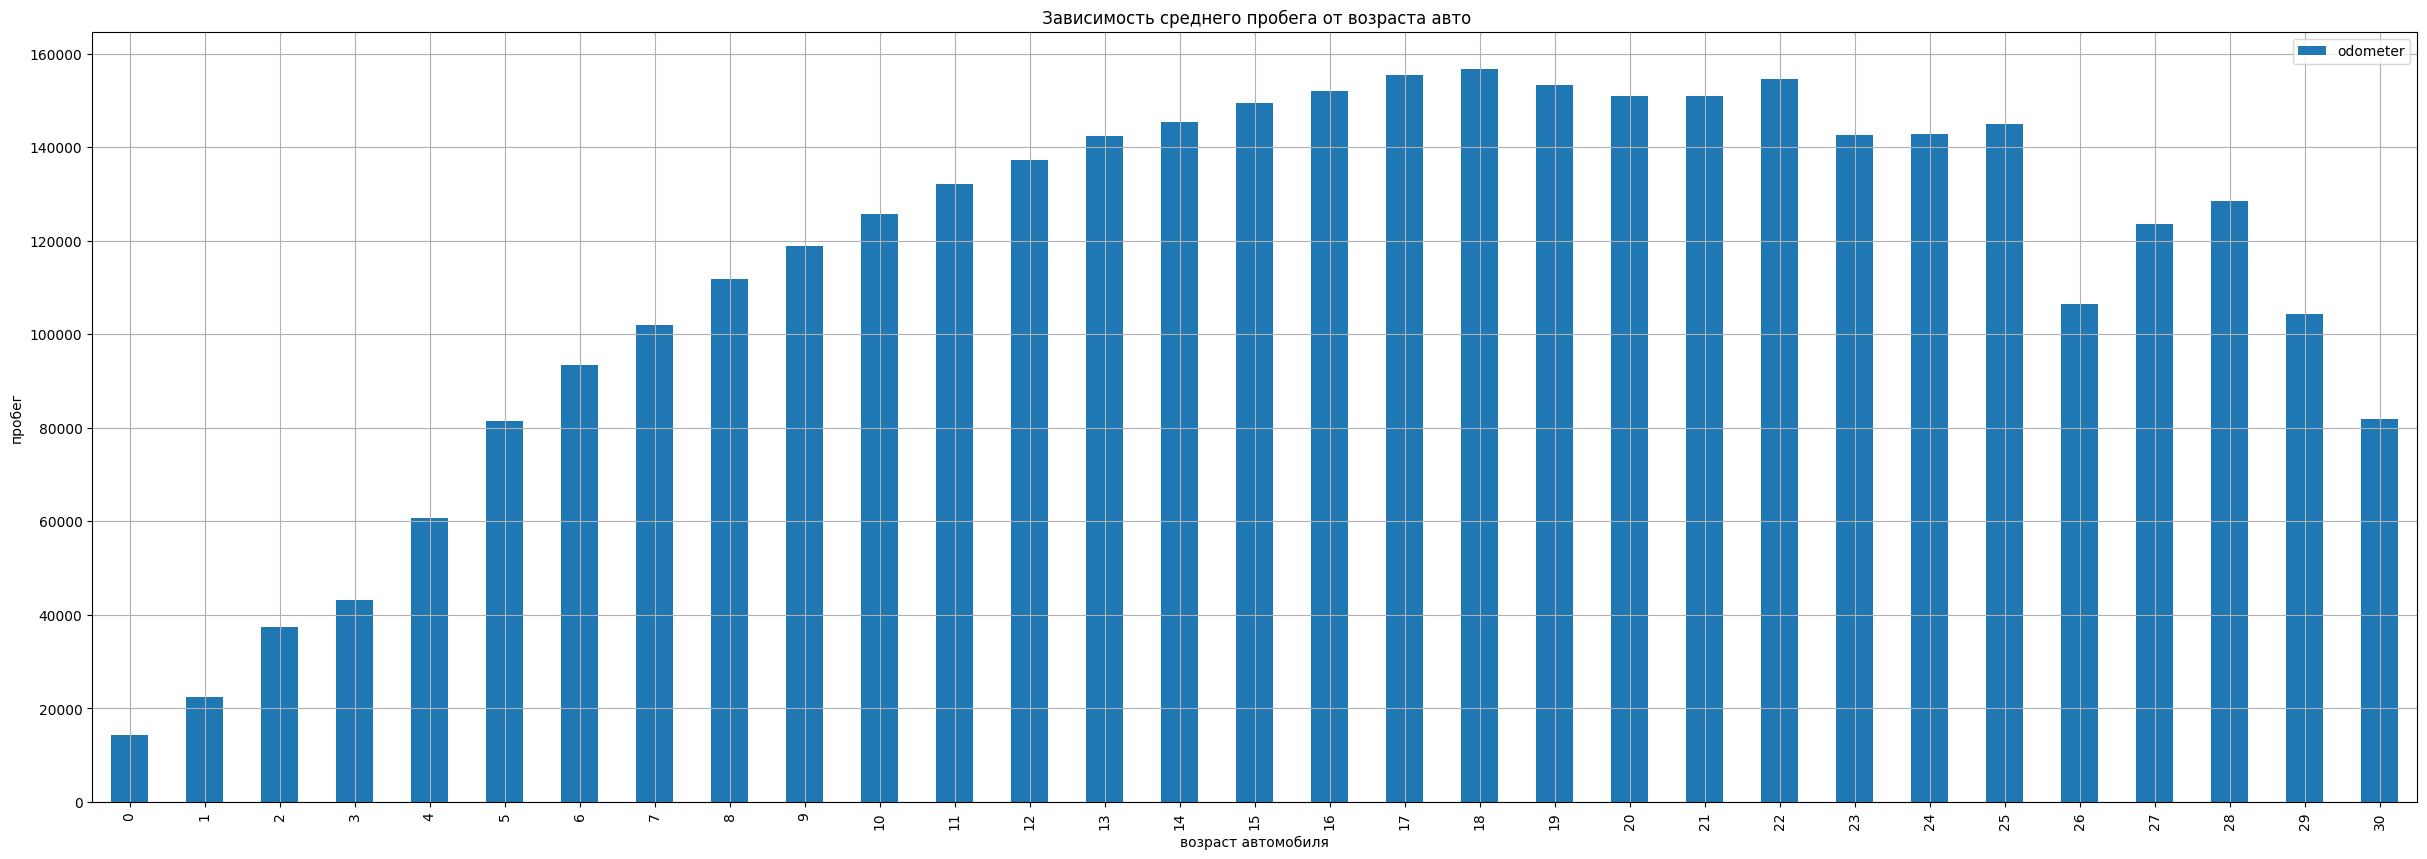

In [182]:
df_train.pivot_table(index = 'age', values = 'odometer', aggfunc = 'mean').plot(kind='bar', grid=True, figsize=(30, 10));
plt.xlabel('возраст автомобиля')
plt.ylabel('пробег')
plt.title(' Зависимость среднего пробега от возраста авто')
plt.show()

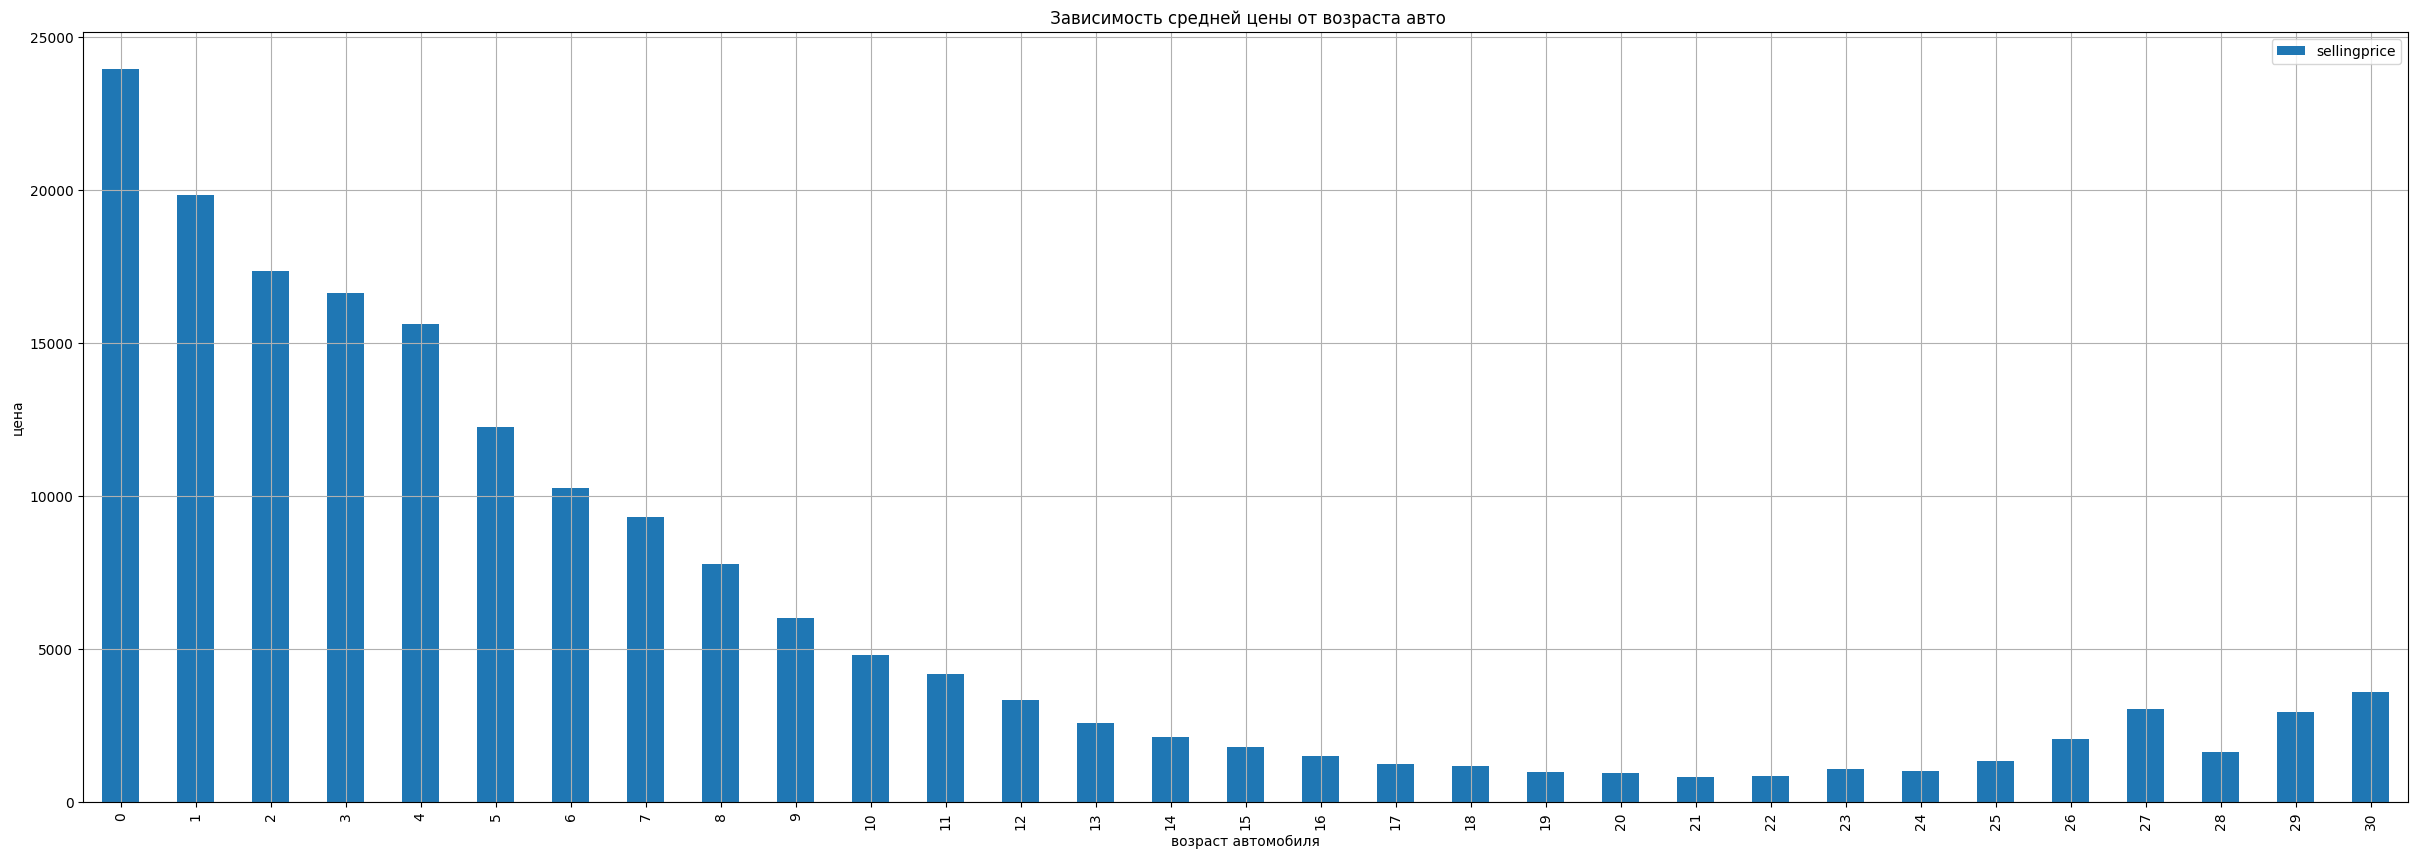

In [183]:
df_train.pivot_table(index = 'age', values = 'sellingprice', aggfunc = 'mean').plot(kind='bar', grid=True, figsize=(30, 10));
plt.xlabel('возраст автомобиля')
plt.ylabel('цена')
plt.title(' Зависимость средней цены от возраста авто')
plt.show()

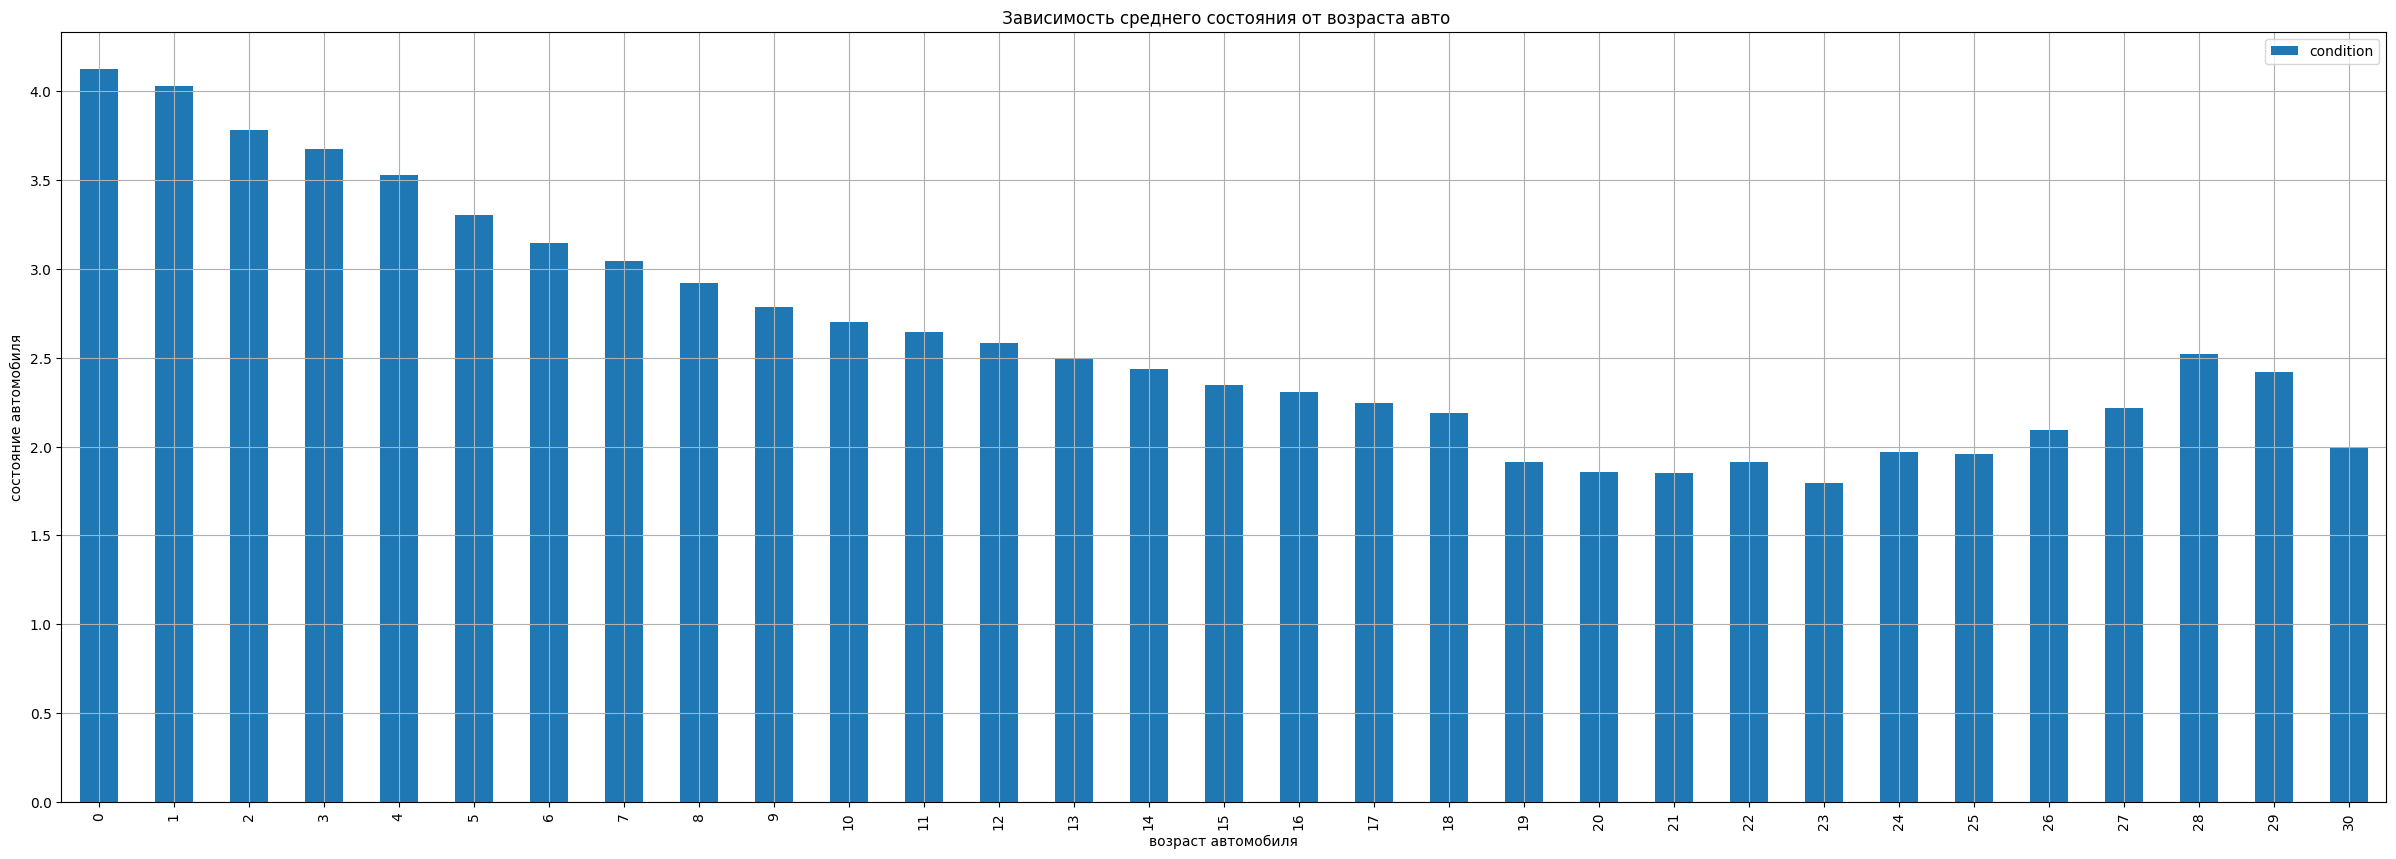

In [184]:
df_train.pivot_table(index = 'age', values = 'condition', aggfunc = 'mean').plot(kind='bar', grid=True, figsize=(30, 10));
plt.xlabel('возраст автомобиля')
plt.ylabel('состояние автомобиля')
plt.title(' Зависимость среднего состояния от возраста авто')
plt.show()

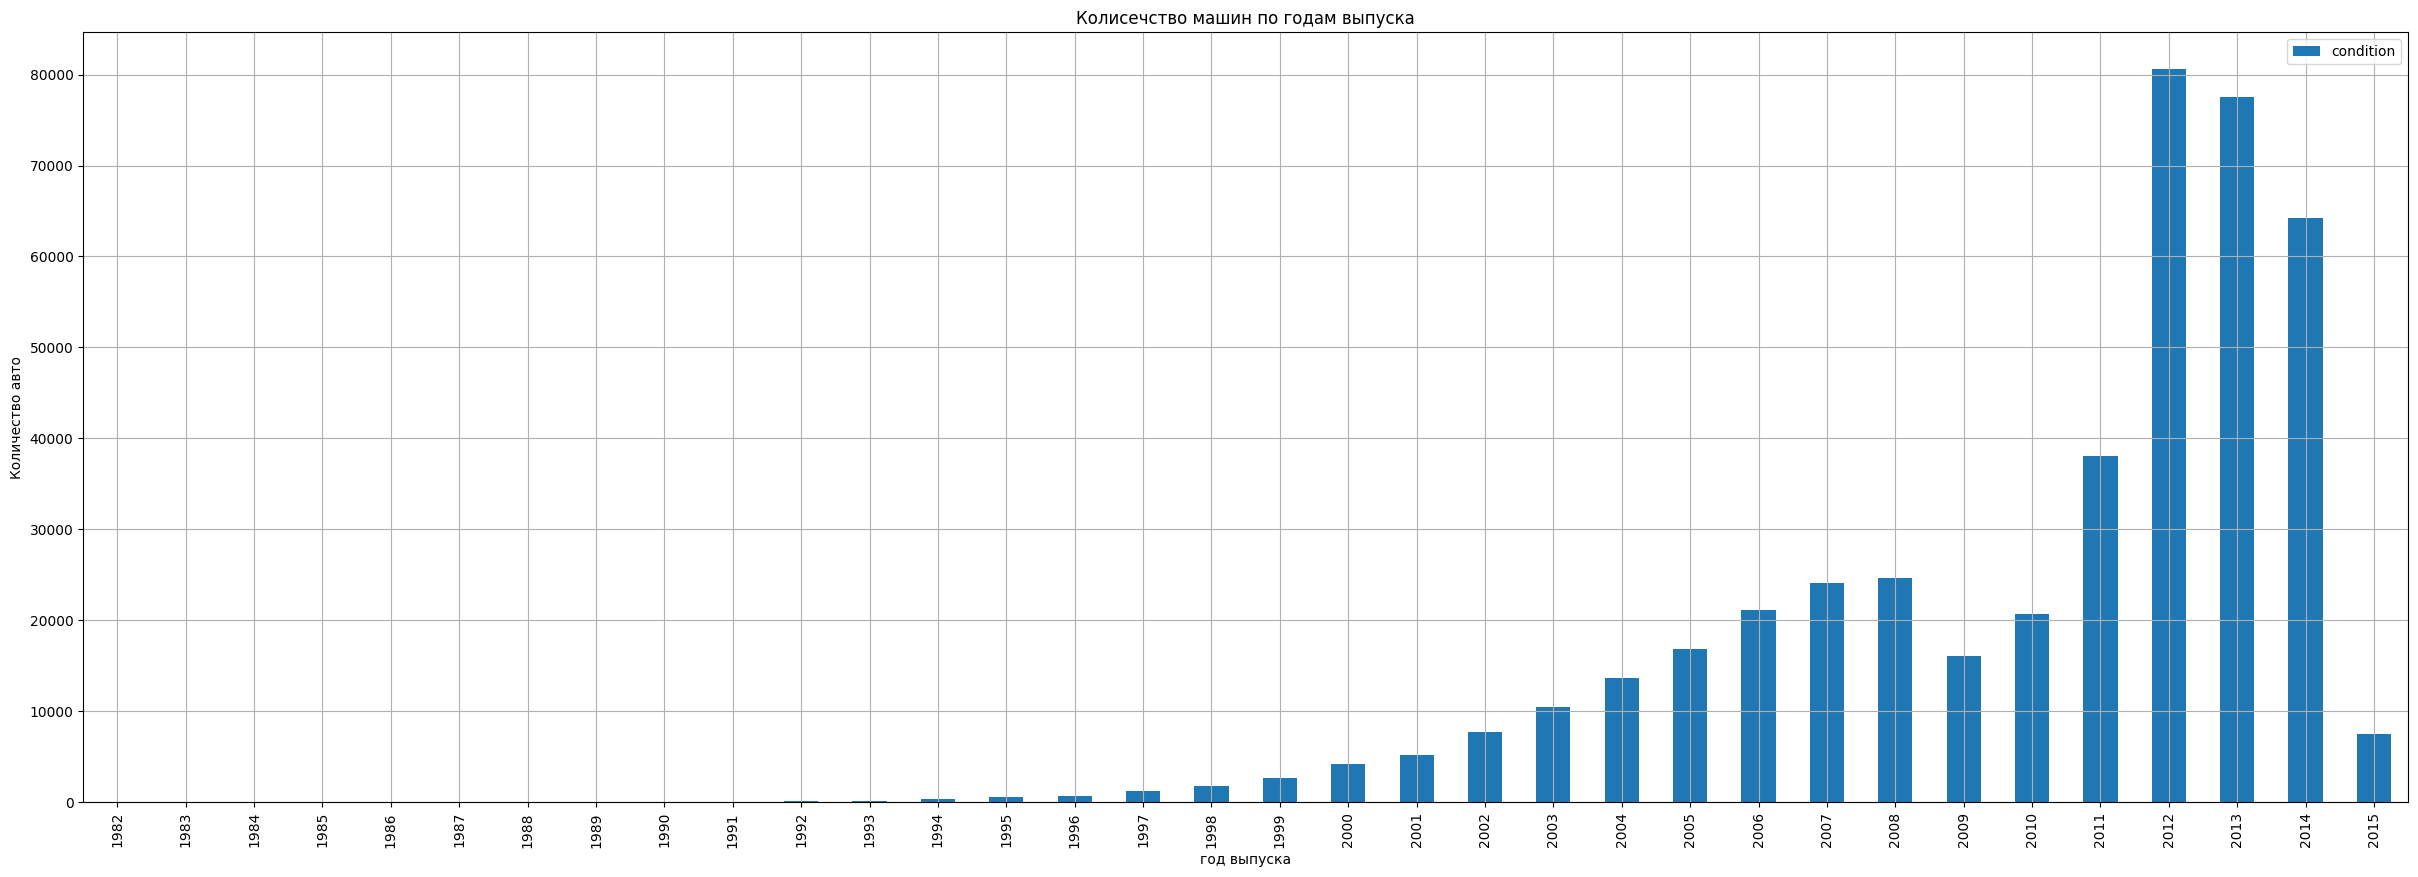

In [185]:
df_train.pivot_table(index = 'year', values = 'condition', aggfunc = 'count').plot(kind='bar', grid=True, figsize=(30, 10));
plt.xlabel('год выпуска')
plt.ylabel('Количество авто')
plt.title('Колисечство машин по годам выпуска')
plt.show()

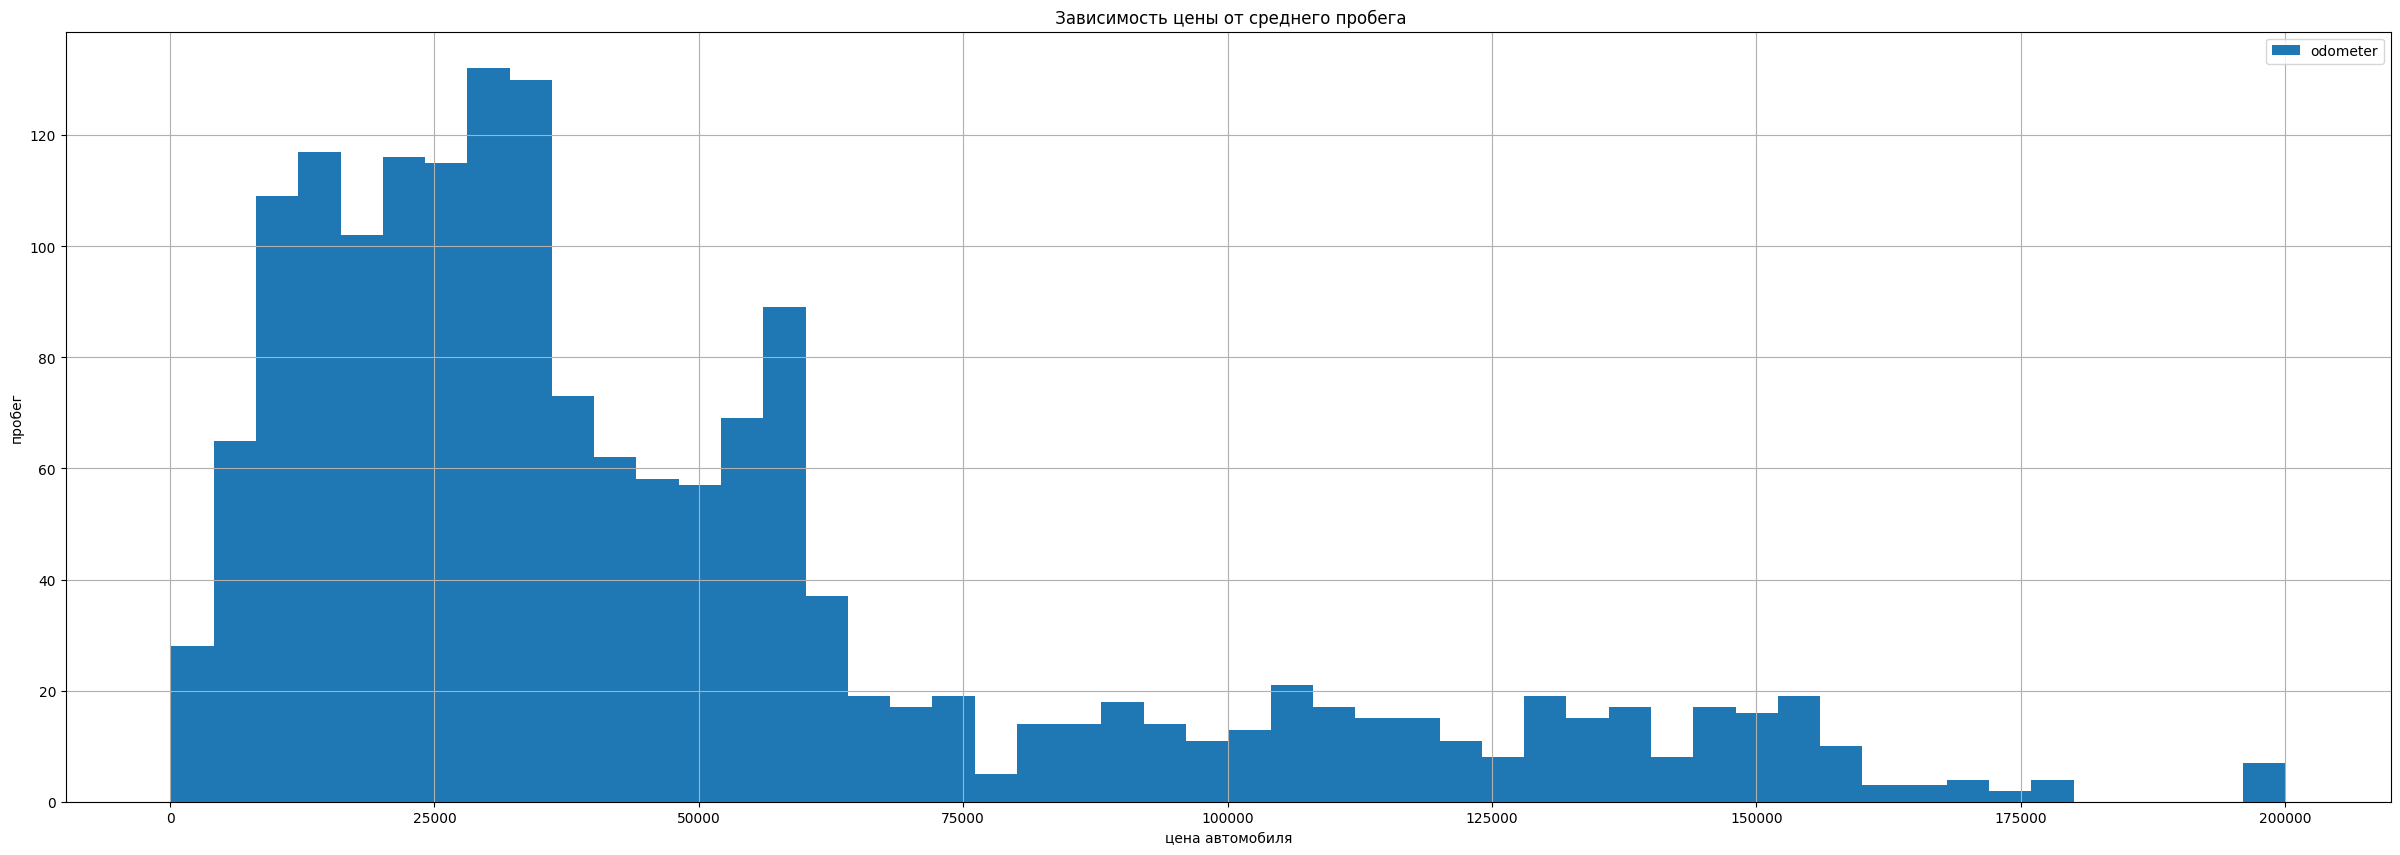

In [186]:
df_train.pivot_table(index = 'sellingprice', values = 'odometer', aggfunc = 'mean').plot(kind='hist',bins=50, grid=True, figsize=(30, 10));
plt.xlabel('цена автомобиля')
plt.ylabel('пробег')
plt.title(' Зависимость цены от среднего пробега')
plt.show()

# Выбор и обучение моделей

Первая модель CatBoostRegressor. CatBoost позволяет использовать категориальные признаки без необходимости их предварительно обрабатывать.

При использовании CatBoost мы не должны пользоваться one-hot кодированием, поскольку это влияет на скорость обучения и на качество прогнозов. Вместо этого мы просто задаем категориальные признаки с помощью параметра cat_features.

In [187]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')
df_test2 = df_test

df_train_cb = df_train.drop(columns=['interior', 'color','sale_year','saledate','vin'])
df_test_cb = df_test.drop(columns=['interior', 'color','sale_year','saledate','vin'])

In [189]:
display(df_train_cb.head())
df_test_cb.head()

,year,make,model,trim,body,transmission,state,condition,odometer,seller,sellingprice,age
0,2011,Ford,Edge,SEL,Suv,automatic,md,4.2,111041.0,santander consumer,12500,4
1,2014,Ford,Fusion,SE,Sedan,automatic,mo,3.5,31034.0,ars/avis budget group,14500,1
2,2012,Nissan,Sentra,2.0 SL,Sedan,automatic,nj,2.2,35619.0,nissan-infiniti lt,9100,3
3,2003,Hummer,H2,BASE,Suv,automatic,tx,2.8,131301.0,wichita falls ford lin inc,13300,12
4,2007,Ford,Fusion,SEL,Sedan,automatic,md,2.0,127709.0,purple heart,1300,8


,year,make,model,trim,body,transmission,state,condition,odometer,seller,age
0,2005,Cadillac,Cts,BASE,Sedan,automatic,ca,2.7,116970.0,lexus of stevens creek,10
1,2014,GMC,Savana Cargo,2500,Van,automatic,pa,4.4,6286.0,u-haul,1
2,2013,Nissan,Murano,S,Suv,automatic,oh,4.6,11831.0,nissan-infiniti lt,2
3,2013,Chevrolet,Impala,LS FLEET,Sedan,automatic,fl,2.3,57105.0,onemain rem/auto club of miami inc dba north dad,2
4,2013,Nissan,Titan,SV,Crew Cab,automatic,tn,2.9,31083.0,nissan north america inc.,2


Функция для расчета метрики:

In [194]:
def calculate_mape_numpy(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    if actual.shape != predicted.shape:
        raise ValueError("Input arrays must have the same shape")
    if np.any(actual == 0):
        raise ValueError("Actual values must be non-zero")
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return abs(mape)

 
mape_score = make_scorer(calculate_mape_numpy, greater_is_better = False)


Выделим категориальные признаки и числовые признак в обучающем наборе:

In [196]:
target = df_train_cb['sellingprice']
features = df_train_cb.drop(['sellingprice'], axis=1)
features_test = df_test_cb
cat_features = ['seller','state', 'year', 'make', 'model', 'trim', 'body', 'transmission']


Создадим модель CatBoostRegressor:

In [197]:
model = CatBoostRegressor(iterations = 2300, border_count = 254, grow_policy = 'Depthwise' )

Подберем гиперпараметры:

In [198]:
param_grid={'iterations': [2300],
           'learning_rate': [0.105, 0.11],
           'depth' : [10]}
grid = GridSearchCV(model, param_grid=param_grid, cv=2, scoring = mape_score)

Обучим модель:

In [199]:
%%time
grid.fit(features, target,
         cat_features=cat_features,
         verbose=50
)

0:	learn: 9012.3332524	total: 304ms	remaining: 11m 38s
50:	learn: 2800.6679038	total: 16s	remaining: 11m 47s
100:	learn: 2468.8726544	total: 30.2s	remaining: 10m 58s
150:	learn: 2281.9041924	total: 45.2s	remaining: 10m 43s
200:	learn: 2152.4211570	total: 1m 1s	remaining: 10m 42s
250:	learn: 2052.7554934	total: 1m 16s	remaining: 10m 26s
300:	learn: 1974.4431848	total: 1m 32s	remaining: 10m 11s
350:	learn: 1906.6700068	total: 1m 47s	remaining: 9m 56s
400:	learn: 1850.6474910	total: 2m 3s	remaining: 9m 43s
450:	learn: 1805.1927875	total: 2m 15s	remaining: 9m 16s
500:	learn: 1753.5394563	total: 2m 28s	remaining: 8m 55s
550:	learn: 1709.8993277	total: 2m 41s	remaining: 8m 33s
600:	learn: 1673.1409925	total: 2m 53s	remaining: 8m 11s
650:	learn: 1636.7241342	total: 3m 6s	remaining: 7m 51s
700:	learn: 1603.6502925	total: 3m 18s	remaining: 7m 32s
750:	learn: 1573.4649275	total: 3m 32s	remaining: 7m 18s
800:	learn: 1541.9862180	total: 3m 46s	remaining: 7m 4s
850:	learn: 1515.1324708	total: 4m 2s

100:	learn: 2465.3867047	total: 50.8s	remaining: 18m 26s
150:	learn: 2274.7919399	total: 1m 11s	remaining: 16m 58s
200:	learn: 2125.2152137	total: 1m 34s	remaining: 16m 30s
250:	learn: 2022.1303601	total: 1m 57s	remaining: 16m
300:	learn: 1944.7691830	total: 2m 21s	remaining: 15m 39s
350:	learn: 1878.0234416	total: 2m 44s	remaining: 15m 16s
400:	learn: 1816.9712552	total: 3m 9s	remaining: 14m 55s
450:	learn: 1765.4294113	total: 3m 29s	remaining: 14m 18s
500:	learn: 1720.2978281	total: 3m 50s	remaining: 13m 46s
550:	learn: 1676.6687489	total: 4m 11s	remaining: 13m 17s
600:	learn: 1634.4098302	total: 4m 32s	remaining: 12m 50s
650:	learn: 1602.4346598	total: 4m 50s	remaining: 12m 16s
700:	learn: 1570.7259972	total: 5m 9s	remaining: 11m 45s
750:	learn: 1535.8458406	total: 5m 30s	remaining: 11m 21s
800:	learn: 1505.3821514	total: 5m 50s	remaining: 10m 55s
850:	learn: 1477.5221419	total: 6m 10s	remaining: 10m 30s
900:	learn: 1450.2614886	total: 6m 30s	remaining: 10m 6s
950:	learn: 1422.02697

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000024A142B7CA0>,
             param_grid={'depth': [10], 'iterations': [2300],
                         'learning_rate': [0.105, 0.11]},
             scoring=make_scorer(calculate_mape_numpy, greater_is_better=False))

In [200]:
grid.best_score_


-15.2393045286506

In [201]:
model= grid.best_estimator_

In [202]:
pred = model.predict(features_test)
pred = pd.Series(pred)
pred.describe()

count    110058.000000
mean      13613.479554
std        9454.938690
min       -3200.526187
25%        6886.542445
50%       12165.487222
75%       18305.757058
max      141660.689520
dtype: float64

<AxesSubplot:>

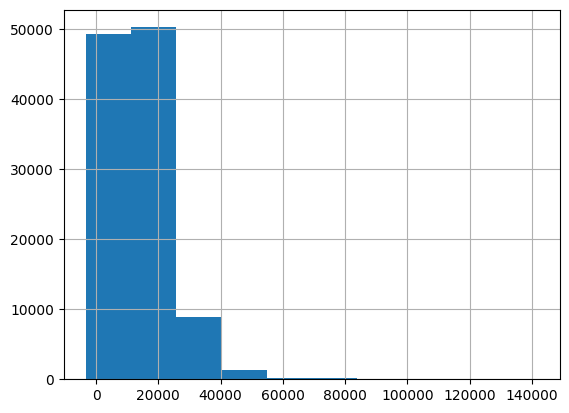

In [203]:
pred.hist()

In [204]:
pred.loc[pred<0]

1837     -582.211294
3961     -908.662976
6128     -382.676811
6910     -169.513690
6940     -413.226230
             ...    
104320   -756.266518
104399   -599.229289
105230   -143.581761
105849   -674.164481
107629   -206.812786
Length: 68, dtype: float64

In [205]:
score =  mape_score(model, features, target)
abs(score)

10.623369117637532

In [206]:
predict = pd.DataFrame(df_test2['vin'])
predict

,vin
0,1g6dp567450124779
1,1gtw7fca7e1902207
2,jn8az1mw6dw303497
3,2g1wf5e34d1160703
4,1n6aa0ec3dn301209
...,...
110053,1j4aa2d17bl584330
110054,jthbf1d23e5007526
110055,1n4ba41e54c831950
110056,jn1az4eh3dm382431


In [207]:
predict['sellingprice'] = pd.Series(abs(dtr))
predict

,vin,sellingprice
0,1g6dp567450124779,4909.240233
1,1gtw7fca7e1902207,21937.296014
2,jn8az1mw6dw303497,19507.221265
3,2g1wf5e34d1160703,8772.375881
4,1n6aa0ec3dn301209,23636.179103
...,...,...
110053,1j4aa2d17bl584330,17020.719995
110054,jthbf1d23e5007526,29712.302955
110055,1n4ba41e54c831950,4243.025896
110056,jn1az4eh3dm382431,21085.757507


Сохраним файл с прогнозом:

In [208]:
predict.to_csv('predict_cat_boost_final.csv', index=False)